In [ ]:
include("../src/ColdAtoms.jl")
using .ColdAtoms

In [ ]:
using PyPlot
using QuantumOptics
using BenchmarkTools
using CSV, DataFrames

In [ ]:
fontsize = 14;
linewidth = 2;
color = "red";

In [ ]:
#Default simulation parameters
include("../params/default.jl")

N = 200;
samples, acc_rate = samples_generate(trap_params, atom_params, N; skip=5000, freq=1000);

Ωr = 2π * 60.0;
red_laser_params = [Ωr, wr, zr];
detuning_params = [Δ0, δ_twophoton(Ωr, Ωb, Δ0)];

T0 = T_twophoton(Ωr, Ωb, Δ0);
tspan = [0.0:T0/30:2.5*T0;];
ψ0 = g;

In [ ]:
ρ_mean, ρ2_mean = 
    simulation(
        tspan, ψ0, 
        
        atom_params,
        trap_params,
        samples,
        
        f,
        red_laser_phase_amplitudes,
        blue_laser_phase_amplitudes,
        
        red_laser_params,
        blue_laser_params,
        
        detuning_params,
        decay_params;
        
        spontaneous_decay=false,
        atom_motion=false,
        laser_noise=false,
        parallel=false,
        free_motion=true
    );

In [ ]:
function add_contrast(Pg, Pr, ϵ, ϵt, η)
    Pg_temp = η*(1.0 - ϵ) .+ (1.0 - η)*(1.0 - ϵ)*(Pg + ϵt * Pr);
    Pr_temp = η*ϵ .+ (1.0 - η)*(ϵ*Pg + (1.0 - ϵt + ϵ*ϵt)*Pr);
    return Pg_temp, Pr_temp
end;

ϵ, ϵt, η = 0.05, 0.05, 0.0

(0.05, 0.05, 0.0)

In [ ]:
filename_rydberg = "../data/2023_10_24_N59_rydberg_tX_rez178.5.dat";
filename_rydberg1 = "../data/2023_10_24_N58_rydberg_tX_rez178.5.dat";
filename_rydberg2 = "../data/2023_10_24_N58_rydberg_tX_rez178.5_2.dat";
filename_rydberg3 = "../data/2023_10_24_N58_rydberg_tX_rez178.5_3.dat";

df_rydberg = DataFrame(CSV.File(filename_rydberg, delim=" ", header=30, ignorerepeated=true, types=Float64))
x = df_rydberg[1:end, 1];
y = df_rydberg[1:end, 4];
yerr = df_rydberg[1:end, 5];

┌ Warning: thread = 1 warning: only found 16 / 17 columns around data row: 1. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 16 / 17 columns around data row: 2. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 16 / 17 columns around data row: 3. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 16 / 17 columns around data row: 4. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 16 / 17 columns around data row: 5. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 16 / 17 columns around data row: 6. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/

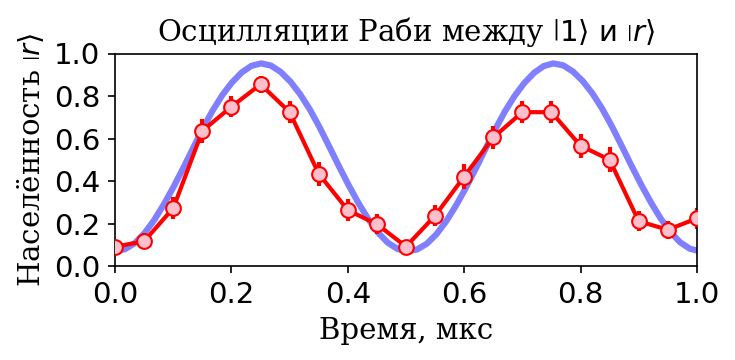

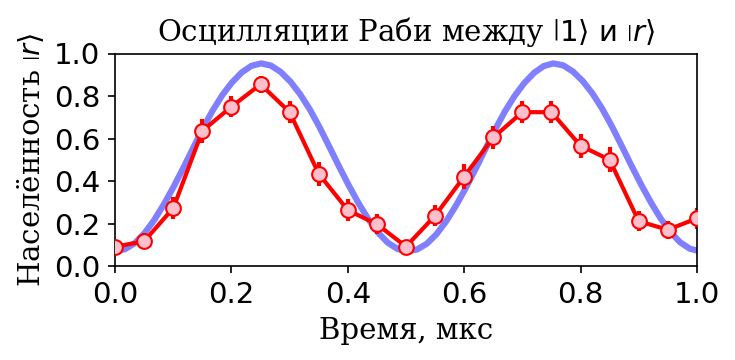

In [ ]:
ϵ, ϵt, η = 0.07, 0.05, 0.0
fontsize=14;
Pg = real(expect(g ⊗ dagger(g), ρ_mean)); 
Pr = real(expect(r ⊗ dagger(r), ρ_mean));
Pg_temp, Pr_temp = add_contrast(Pg, Pr, ϵ, ϵt, η);

figure(figsize=(5,2.5), dpi=150)
plot(tspan, Pr_temp, color="blue", alpha=0.5, linewidth=3.0, label="Моделирование")
# plot(tspan, Pr, label="W/o contrast")


errorbar(x / 1000, 1.0 .- y, yerr, color="red", linewidth=2.0, alpha=1.0)
scatter(x / 1000, 1.0 .- y, color="pink", s=50, alpha=1.0,edgecolor="red", zorder=3, label="Эксперимент")
# plot(x/1000, 0.5*(1.0 .- cos.(4 * π * x/1000)))
xlim(0.0, 1.0)
ylim(0.0, 1.0)
xticks(fontsize=14)
yticks(fontsize=14)
xlabel("Время, мкс", fontsize=fontsize, fontfamily="serif")
ylabel("Населённость \$ \\left| r \\right> \$", fontsize=fontsize, fontfamily="serif")
title("Осцилляции Раби между \$ \\left| 1 \\right> \\text{ и }  \\left| r \\right> \$", fontsize=14, fontfamily="serif")
# legend()
tight_layout()
# savefig("../results/rabi.png", dpi=200, transparent=true)
# savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/rydberg.png", dpi=250)
# savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/rydberg.pdf", dpi=250)
# savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/rydberg.svg", dpi=250)

# savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/rydberg_model.png", dpi=300)
# savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/rydberg_model.pdf", dpi=300)
# savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/rydberg_model.svg", dpi=300)
gcf()